<a href="https://colab.research.google.com/github/STNox/Deep-Learning/blob/master/2.%20Model/04_%EC%B4%88%EC%9D%8C%ED%8C%8C_%EA%B4%91%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 초음파 광물 예측

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filename

Saving sonar.csv to sonar (3).csv


'sonar.csv'

In [4]:
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df[60].values)
y_encoded[95:100]

array([1, 1, 0, 0, 0])

In [7]:
X = df.iloc[:, :-1].values
X.shape

(208, 60)

### 과적합 발생

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                    Dense(24, input_dim=60, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1464      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(X, y_encoded, batch_size=10, epochs=200, verbose=0)

In [11]:
acc = model.evaluate(X, y_encoded)
print(f'Accuracy: {acc[1]:.4f}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 1.0000
Accuracy: 1.0000


### Train/Test 데이터셋으로 나누기

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=seed, stratify=y_encoded)
X_train.shape, X_test.shape

((156, 60), (52, 60))

In [13]:
model2 = Sequential([
                    Dense(24, input_dim=60, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                1464      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 1,673
Trainable params: 1,673
Non-trainable params: 0
_________________________________________________________________


In [14]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model2.fit(X_train, y_train, batch_size=10, epochs=200, verbose=0)

In [16]:
acc = model2.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 5ms/step - loss: 0.6994 - accuracy: 0.8077
Accuracy: 0.8077


### 모델 저장하기

In [17]:
model2.save('my_model2.h5')

In [18]:
!ls -l

total 408
-rw-r--r-- 1 root root 51312 Feb  9 06:35  my_model2.h5
drwxr-xr-x 1 root root  4096 Feb  4 15:26  sample_data
-rw-r--r-- 1 root root 87776 Feb  9 05:15 'sonar (1).csv'
-rw-r--r-- 1 root root 87776 Feb  9 05:51 'sonar (2).csv'
-rw-r--r-- 1 root root 87776 Feb  9 06:35 'sonar (3).csv'
-rw-r--r-- 1 root root 87776 Feb  9 05:15  sonar.csv


In [19]:
from tensorflow.keras.models import load_model

my_model = load_model('my_model2.h5')
acc = my_model.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 5ms/step - loss: 0.6994 - accuracy: 0.8077
Accuracy: 0.8077


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

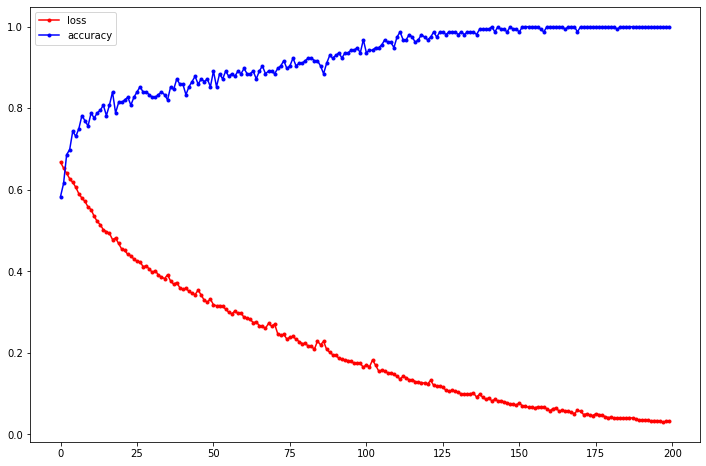

In [25]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12, 8))
plt.plot(x_len, y_loss, 'o-', c='red', markersize=3, label='loss')
plt.plot(x_len, y_acc, 'o-', c='blue', markersize=3, label='accuracy')
plt.legend()
plt.show()

### 은닉층 수에 따른 예측률 변화

#### 은닉층 0개

In [26]:
model_0 = Sequential([Dense(1, input_dim=60, activation='sigmoid')])
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_0.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
history_0 = model_0.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.7949
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8013
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4558 - accuracy: 0.7885
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7949
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.7949
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.8013
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7949
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.8013
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.8013
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.8013
Epoch 11/

In [29]:
acc = model_0.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7692
Accuracy: 0.7692


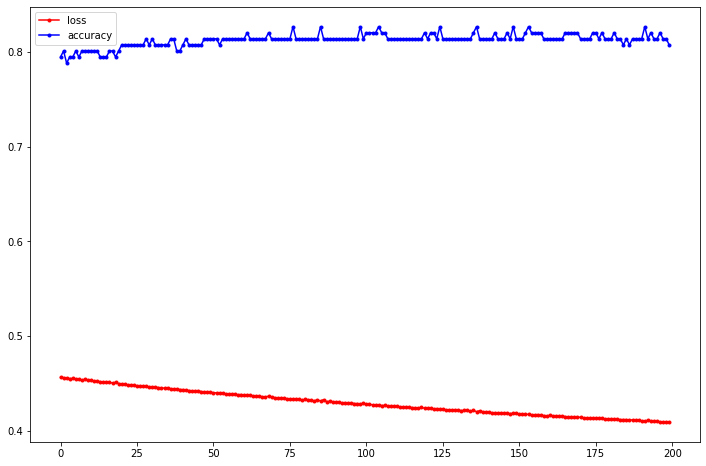

In [36]:
y0_loss = history_0.history['loss']
y0_acc = history_0.history['accuracy']
x0_len = np.arange(len(y0_acc))
plt.figure(figsize=(12, 8))
plt.plot(x0_len, y0_loss, 'o-', c='red', markersize=3, label='loss')
plt.plot(x0_len, y0_acc, 'o-', c='blue', markersize=3, label='accuracy')
plt.legend()
plt.show()

#### 은닉층 3개

In [32]:
model_3 = Sequential([
                      Dense(48, input_dim=60, activation='relu'),
                      Dense(24, activation='relu'),
                      Dense(8, activation='relu'),
                      Dense(1, activation='sigmoid')
])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 48)                2928      
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 4,313
Trainable params: 4,313
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
history_3 = model_3.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5154
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6548 - accuracy: 0.6715
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.6632
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.6974
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.6948
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7504
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.8189
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7833
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4924 - accuracy: 0.7885
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7416
Epoch 11/

In [35]:
acc = model_3.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 4ms/step - loss: 0.9677 - accuracy: 0.8077
Accuracy: 0.8077


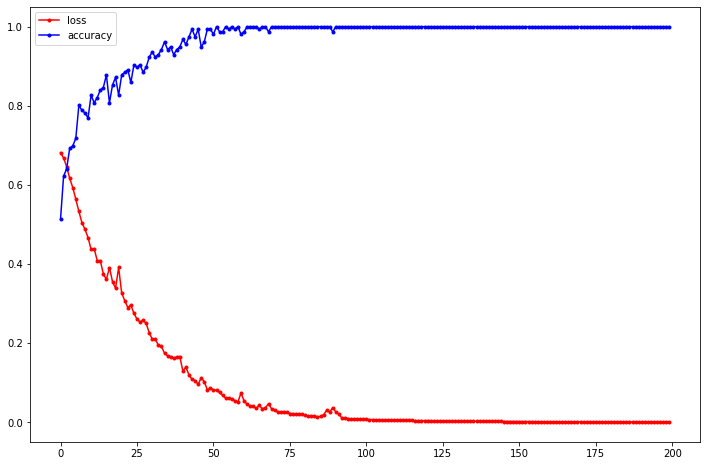

In [37]:
y3_loss = history_3.history['loss']
y3_acc = history_3.history['accuracy']
x3_len = np.arange(len(y3_acc))
plt.figure(figsize=(12, 8))
plt.plot(x3_len, y3_loss, 'o-', c='red', markersize=3, label='loss')
plt.plot(x3_len, y3_acc, 'o-', c='blue', markersize=3, label='accuracy')
plt.legend()
plt.show()

#### 은닉층 6개

In [38]:
model_6 = Sequential([
                      Dense(48, input_dim=60, activation='relu'),
                      Dense(32, activation='relu'),
                      Dense(24, activation='relu'),
                      Dense(16, activation='relu'),
                      Dense(8, activation='relu'),
                      Dense(4, activation='relu'),
                      Dense(1, activation='sigmoid')
])
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 48)                2928      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1568      
_________________________________________________________________
dense_13 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                400       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [39]:
model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
history_6 = model_6.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5367
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6830 - accuracy: 0.5334
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.5746
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.5598
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6534 - accuracy: 0.5170
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.5583
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.5779
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.6661
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.7409
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7103
Epoch 11/

In [41]:
acc = model_6.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 5ms/step - loss: 1.4665 - accuracy: 0.8462
Accuracy: 0.8462


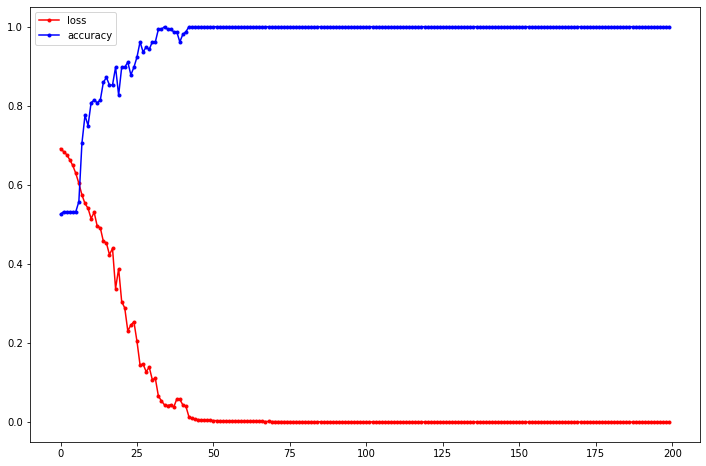

In [42]:
y6_loss = history_6.history['loss']
y6_acc = history_6.history['accuracy']
x6_len = np.arange(len(y6_acc))
plt.figure(figsize=(12, 8))
plt.plot(x6_len, y6_loss, 'o-', c='red', markersize=3, label='loss')
plt.plot(x6_len, y6_acc, 'o-', c='blue', markersize=3, label='accuracy')
plt.legend()
plt.show()

#### 은닉층 24개

In [49]:
dense = [Dense(52, input_dim=60, activation='relu')]
for i in range(23, 0, -1):
  dense.append(Dense(2 * i, activation='relu'))
dense.append(Dense(1, activation='sigmoid'))
model_24 = Sequential(dense)
model_24.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 52)                3172      
_________________________________________________________________
dense_71 (Dense)             (None, 46)                2438      
_________________________________________________________________
dense_72 (Dense)             (None, 44)                2068      
_________________________________________________________________
dense_73 (Dense)             (None, 42)                1890      
_________________________________________________________________
dense_74 (Dense)             (None, 40)                1720      
_________________________________________________________________
dense_75 (Dense)             (None, 38)                1558      
_________________________________________________________________
dense_76 (Dense)             (None, 36)               

In [50]:
model_24.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history_24 = model_24.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5342
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5334
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5746
Epoch 4/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5598
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5170
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5583
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5666
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5302
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4908
Epoch 10/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5220
Epoch 11/

In [52]:
acc = model_24.evaluate(X_test, y_test)
print(f'Accuracy: {acc[1]:.4f}')

2/2 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.5385
Accuracy: 0.5385


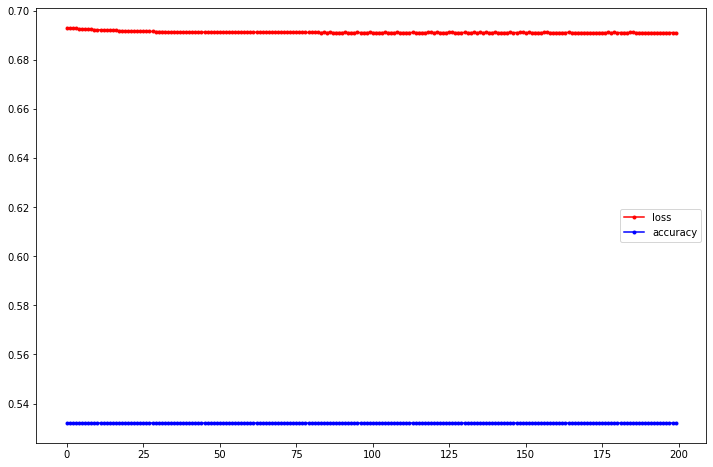

In [53]:
y24_loss = history_24.history['loss']
y24_acc = history_24.history['accuracy']
x24_len = np.arange(len(y24_acc))
plt.figure(figsize=(12, 8))
plt.plot(x24_len, y24_loss, 'o-', c='red', markersize=3, label='loss')
plt.plot(x24_len, y24_acc, 'o-', c='blue', markersize=3, label='accuracy')
plt.legend()
plt.show()